In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential

#Metodo Word embeddings

# Load the IMDB dataset with a vocabulary size of 10,000
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad the sequences to a maximum length of 256 words
maxlen = 256
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build a simple neural network model with an embedding layer
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the neural network model on the word embedding sequences
history= model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the neural network model on the word embedding sequences
train_acc = model.evaluate(x_train, y_train)[1]
test_acc = model.evaluate(x_test, y_test)[1]

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

# Guardar el modelo entrenado
model.save("modelo.h5")


17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
782/782 [==============================] - 23s 27ms/step - loss: 0.5265 - accuracy: 0.7872 - val_loss: 0.3762 - val_accuracy: 0.8571
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.3050 - accuracy: 0.8851 - val_loss: 0.3049 - val_accuracy: 0.8763
Epoch 3/10
782/782 [==============================] - 19s 24ms/step - loss: 0.2410 - accuracy: 0.9111 - val_loss: 0.2816 - val_accuracy: 0.8868
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.2051 - accuracy: 0.9258 - val_loss: 0.2862 - val_accuracy: 0.8821
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1792 - accuracy: 0.9354 - val_loss: 0.2873 - val_accuracy: 0.8836
Epoch 6/10
782/782 [==============================] - 19s 24ms/step - loss: 0.1595 - accuracy: 0.9442 - val_loss: 0.2968 - val_accuracy: 0.8811
Epoch 7/10
782/782 [==============================] - 19s 24ms/step - l

782/782 [==============================] - 3s 3ms/step


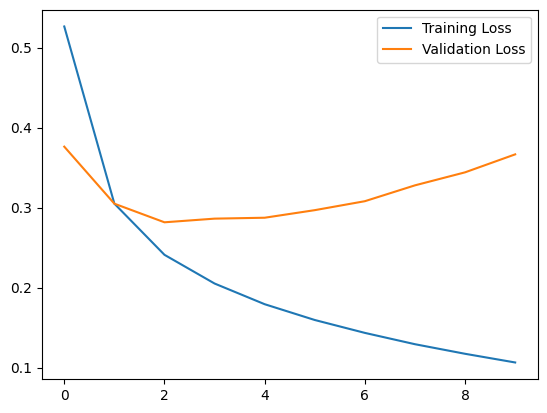

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Obtener las predicciones del modelo en los datos de prueba
y_pred = model.predict(x_test)

# Convertir las probabilidades a etiquetas binarias
y_pred = np.round(y_pred)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la evolución del loss y accuracy durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()



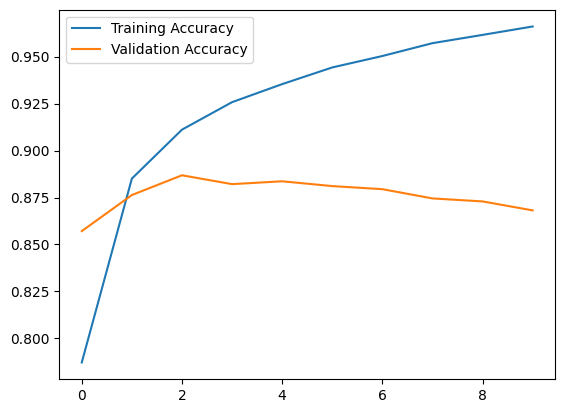

Confusion Matrix:
[[10994  1506]
 [ 1790 10710]]


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Imprimir la matriz de confusión
print('Confusion Matrix:')
print(cm)

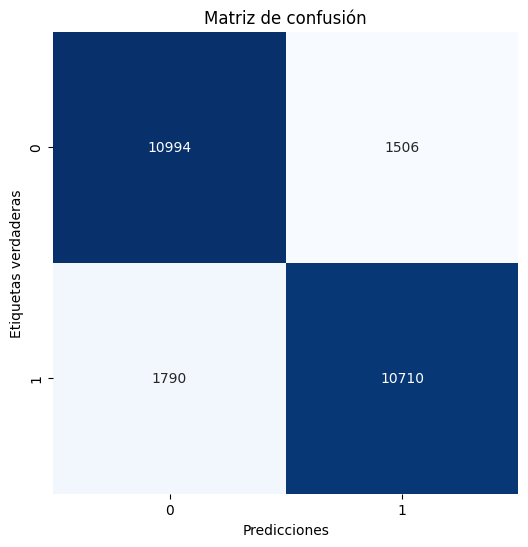

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.show()


In [ ]:
# Prompt the user to enter a review for classification
user_review = input("Enter a review for classification: ")

# Tokenize the user's review using the IMDB dataset's word index
word_index = imdb.get_word_index()
user_tokens = [word_index[word] if word in word_index else 0 for word in user_review.split()]

# Pad the user's tokens to a maximum length of 256 words
user_padded = pad_sequences([user_tokens], maxlen=maxlen)

# Use the trained model to predict the sentiment of the user's review
prediction = model.predict(user_padded)[0][0]

# Print the predicted sentiment
if prediction >= 0.5:
    print(f"Prediction: {prediction}")
    print("Positive review!")
else:
    print(f"Prediction: {prediction}")
    print("Negative review.")

Enter a review for classification: This show was an amazing, fresh & innovative idea in the 70's when 
1/1 [==============================] - 0s 21ms/step
Prediction: 0.5279856324195862
Positive review!
